<a href="https://colab.research.google.com/github/rashidpatel04/OASIS-INFOBYTE-TASK-4-BY-RASHID.P/blob/main/OASIS_INFOBYTE_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP**

# **PROJECT 1 PROPOSAL LEVEL 2 BY RASHID PATEL:  PREDICTING HOUSE PRICES WITH LINEAR REGRESSION**



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Dataset
file_path = '/content/Housing.csv'
data = pd.read_csv(file_path)

# Step 2: Explore the Data
print("Dataset Preview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Handle Missing Values (if any)
print("\nMissing Values in Each Column:")
print(data.isnull().sum())
data = data.dropna()  # Drop rows with missing values (modify as needed)

Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entrie

In [ ]:
# Step 4: Encode Categorical Variables (if any)
data = pd.get_dummies(data, drop_first=True)

# Step 5: Define Features and Target
# Assuming 'price' is the target variable
X = data.drop('price', axis=1)  # Features
y = data['price']               # Target

# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 1754318687330.6638
Root Mean Squared Error (RMSE): 1324506.9600914386
R-squared (R²): 0.6529242642153184


<ipython-input-8-4383a23a2b17>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)


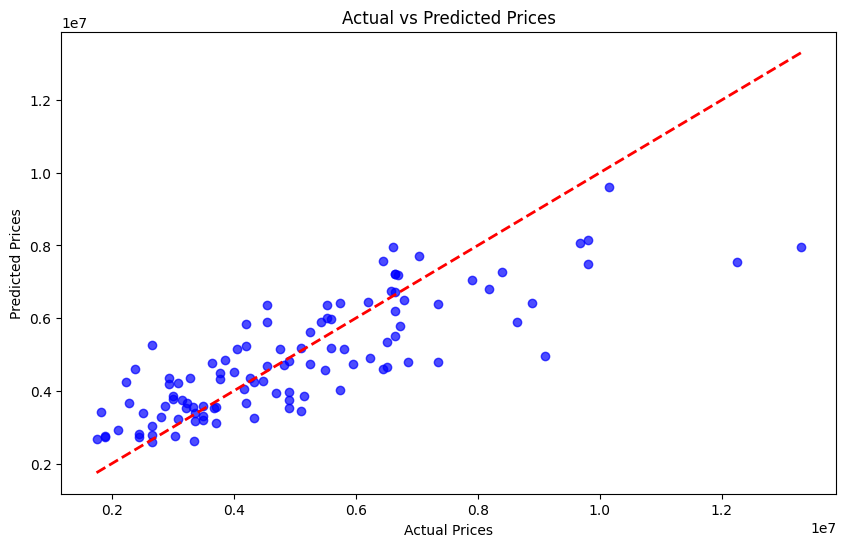

In [ ]:
# Step 10: Visualization
# Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


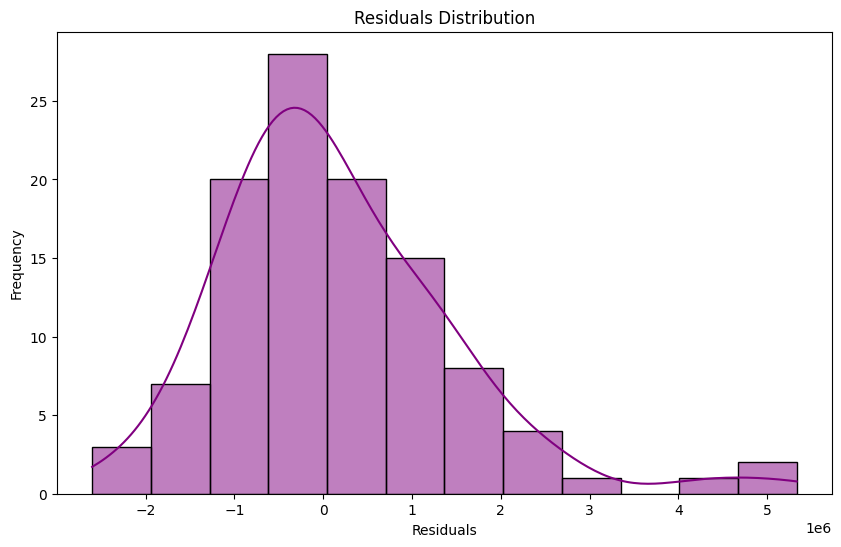

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# **TEST THE MODEL: HOUSE PRICE PREDICTION**

In [ ]:

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load and Prepare the Dataset
file_path = 'Housing.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Select only the relevant features
selected_features = ['area', 'bedrooms', 'bathrooms', 'guestroom', 'mainroad']
X = data[selected_features]  # Features
y = data['price']            # Target

# Encoding categorical variables (mainroad, guestroom)
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Interactive Feature Input and Prediction
def get_user_input():
    """
    Collects user inputs for the selected features dynamically.
    Returns a DataFrame with the user's input aligned with the model's training features.
    """
    input_data = {}
    print("\nPlease provide the following feature values:")

    for feature in selected_features:
        if feature == 'mainroad' or feature == 'guestroom':  # For categorical features, ask 'yes/no'
            value = input(f"Enter value for '{feature}' (yes/no): ").strip().lower()
            if value == 'yes':
                input_data[feature] = 1  # Encode 'yes' as 1
            else:
                input_data[feature] = 0  # Encode 'no' as 0
        else:
            value = input(f"Enter value for '{feature}': ")
            try:
                input_data[feature] = float(value)  # Convert input to float
            except ValueError:
                print(f"Invalid input for '{feature}', defaulting to 0.")
                input_data[feature] = 0  # Default to 0 if input is invalid

    # Create a DataFrame for the user input
    input_df = pd.DataFrame([input_data])

    # Apply the same encoding that was applied to the training set (e.g., dummy encoding for categorical features)
    input_df = pd.get_dummies(input_df, drop_first=True)

    # Ensure columns in the user input match the columns used to train the model
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0  # Add missing columns and set them to 0
    input_df = input_df[X.columns]  # Align columns with the training data

    return input_df

# Predicting House Price
def predict_house_price():
    """
    Collects user input, predicts the house price, and displays the result.
    """
    user_input = get_user_input()

    # Make prediction
    predicted_price = model.predict(user_input)[0]
    print(f"\nPredicted House Price: ₹{predicted_price:.2f}")

# Main function to drive the prediction
def main():
    print("Welcome to the House Price Prediction Program!")

    while True:
        predict_house_price()  # Run the prediction

        # Ask if the user wants another prediction
        repeat = input("\nWould you like to make another prediction? (yes/no): ").strip().lower()
        if repeat != 'yes':
            break

    print("\nThank you for using the House Price Prediction Program! Have a great day.")

# Run the Prediction Program
if __name__ == "__main__":
    main()


Welcome to the House Price Prediction Program!

Please provide the following feature values:
Enter value for 'area': 7420
Enter value for 'bedrooms': 4
Enter value for 'bathrooms': 2
Enter value for 'guestroom' (yes/no): no
Enter value for 'mainroad' (yes/no): yes

Predicted House Price: ₹5941522.22

Would you like to make another prediction? (yes/no): yes

Please provide the following feature values:
Enter value for 'area': 1250
Enter value for 'bedrooms': 1
Enter value for 'bathrooms': 1
Enter value for 'guestroom' (yes/no): no
Enter value for 'mainroad' (yes/no): no

Predicted House Price: ₹1668413.39

Would you like to make another prediction? (yes/no): no

Thank you for using the House Price Prediction Program! Have a great day.
